# Chapter: Dimension Reduction and Latent Variable Methods (Part 2)¶

# Topic: Dimensionality Reduction via FDA

In [24]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Dimensionality reduction via FDA for TEP data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [25]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# fetch TEP data for faults 5,10,19 
TEdata_Fault5_train = np.loadtxt('d05.dat')
TEdata_Fault10_train = np.loadtxt('d10.dat')
TEdata_Fault19_train = np.loadtxt('d19.dat')
TEdata_Faulty_train = np.vstack((TEdata_Fault5_train, TEdata_Fault10_train, TEdata_Fault19_train))

# select variables as done in Lee et al.
xmeas = TEdata_Faulty_train[:,0:22]
xmv = TEdata_Faulty_train[:,41:52]
data_Faulty_train = np.hstack((xmeas, xmv))

# generate sample labels
n_rows_train = TEdata_Fault5_train.shape[0]
y_train = np.concatenate((5*np.ones(n_rows_train,), 10*np.ones(n_rows_train,), 19*np.ones(n_rows_train,)))

In [27]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Faultydata_train_scaled = scaler.fit_transform(data_Faulty_train)

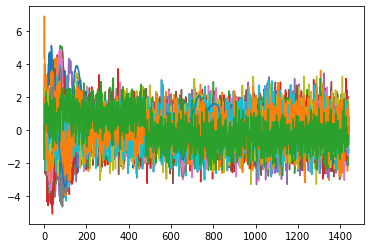

In [29]:
#  visualize all scaled variables
plt.figure()
plt.plot(Faultydata_train_scaled)
plt.show()

In [30]:
#%fit LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
scores_train_lda = lda.fit_transform(Faultydata_train_scaled, y_train)

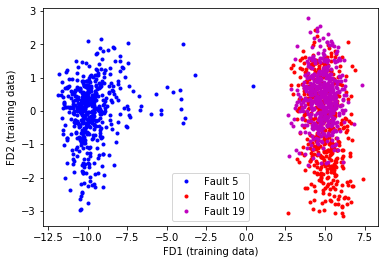

In [31]:
# visualize LDA scores
plt.figure()
plt.plot(scores_train_lda[0:n_rows_train,0], scores_train_lda[0:n_rows_train,1], 'b.', label='Fault 5')
plt.plot(scores_train_lda[n_rows_train:2*n_rows_train,0], scores_train_lda[n_rows_train:2*n_rows_train,1], 'r.', label='Fault 10')
plt.plot(scores_train_lda[2*n_rows_train:3*n_rows_train,0], scores_train_lda[2*n_rows_train:3*n_rows_train,1], 'm.', label='Fault 19')
plt.legend()
plt.xlabel('FD1 (training data)')
plt.ylabel('FD2 (training data)')
plt.show()

In [32]:
# fit PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
scores_train_pca = pca.fit_transform(Faultydata_train_scaled)

Text(0, 0.5, 'PC2 (training data)')

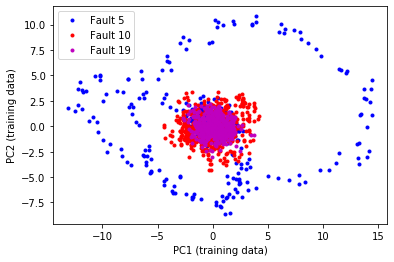

In [33]:
# visualize PCA scores
plt.figure()
plt.plot(scores_train_pca[0:n_rows_train,0], scores_train_pca[0:n_rows_train,1], 'b.', label='Fault 5')
plt.plot(scores_train_pca[n_rows_train:2*n_rows_train,0], scores_train_pca[n_rows_train:2*n_rows_train,1], 'r.', label='Fault 10')
plt.plot(scores_train_pca[2*n_rows_train:3*n_rows_train,0], scores_train_pca[2*n_rows_train:3*n_rows_train,1], 'm.', label='Fault 19')
plt.legend()
plt.xlabel('PC1 (training data)')
plt.ylabel('PC2 (training data)')

In [ ]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Visualize test data 
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [34]:
#%% fetch TE data
TEdata_Fault5_test = np.loadtxt('d05_te.dat')
TEdata_Fault5_test = TEdata_Fault5_test[160:,:]
TEdata_Fault10_test = np.loadtxt('d10_te.dat')
TEdata_Fault10_test = TEdata_Fault10_test[160:,:]
TEdata_Fault19_test = np.loadtxt('d19_te.dat')
TEdata_Fault19_test = TEdata_Fault19_test[160:,:]
TEdata_Faulty_test = np.vstack((TEdata_Fault5_test, TEdata_Fault10_test, TEdata_Fault19_test))

# select variables as done in Lee et al.
xmeas = TEdata_Faulty_test[:,0:22]
xmv = TEdata_Faulty_test[:,41:52]
data_Faulty_test = np.hstack((xmeas, xmv))

# generate sample labels
n_rows_test = TEdata_Fault5_test.shape[0]
y_test = np.concatenate((5*np.ones(n_rows_test,), 10*np.ones(n_rows_test,), 19*np.ones(n_rows_test,)))

In [35]:
# scale data, fit LDA & PCA models
Faultydata_test_scaled = scaler.transform(data_Faulty_test)
scores_test_lda = lda.transform(Faultydata_test_scaled)
scores_test_pca = pca.transform(Faultydata_test_scaled)

Text(0, 0.5, 'PC2 (test data)')

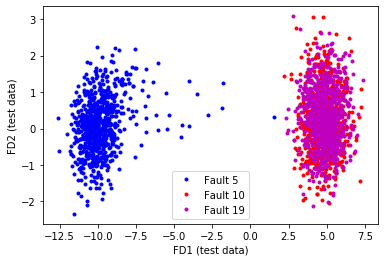

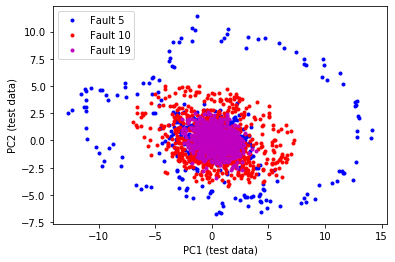

In [36]:
# visualize LDA & PCA scores
plt.figure()
plt.plot(scores_test_lda[0:n_rows_test,0], scores_test_lda[0:n_rows_test,1], 'b.', label='Fault 5')
plt.plot(scores_test_lda[n_rows_test:2*n_rows_test,0], scores_test_lda[n_rows_test:2*n_rows_test,1], 'r.', label='Fault 10')
plt.plot(scores_test_lda[2*n_rows_test:3*n_rows_test,0], scores_test_lda[2*n_rows_test:3*n_rows_test,1], 'm.', label='Fault 19')
plt.legend()
plt.xlabel('FD1 (test data)')
plt.ylabel('FD2 (test data)')

plt.figure()
plt.plot(scores_test_pca[0:n_rows_test,0], scores_test_pca[0:n_rows_test,1], 'b.', label='Fault 5')
plt.plot(scores_test_pca[n_rows_test:2*n_rows_test,0], scores_test_pca[n_rows_test:2*n_rows_test,1], 'r.', label='Fault 10')
plt.plot(scores_test_pca[2*n_rows_test:3*n_rows_test,0], scores_test_pca[2*n_rows_test:3*n_rows_test,1], 'm.', label='Fault 19')
plt.legend()
plt.xlabel('PC1 (test data)')
plt.ylabel('PC2 (test data)')